<a href="https://colab.research.google.com/github/Sankalpa0011/LLM-Evaluate-RAG-Application-With-RAGAS/blob/main/LLM_Evaluate_RAG_Application_With_RAGAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Evaluate RAG Application With **RAGAS** **(RAG Assessment)**

In [1]:
# Install necessary libraries
!pip install ragas==0.1.0 -q
!pip install langchain==0.3.2 -q
!pip install langchain-chroma -q
!pip install langchain-openai -q
!pip install langchain-community -q
!pip install datasets==2.16.1 -q
!pip install pypdf -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.3/454.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
from google.colab import userdata

import warnings
warnings.filterwarnings('ignore')

## Initialize OpenAI LLM

In [4]:
from langchain_openai import ChatOpenAI

# Set OpenAI API key
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

# Initialize the ChatOpenAI model
llm = ChatOpenAI(
    model = "gpt-3.5-turbo",
    temperature = 0
)

## Initialize Embedding Model

In [5]:
from langchain_openai import OpenAIEmbeddings
embedding_model = OpenAIEmbeddings(model="text-embedding-3-small")

## Load PDF Document

In [6]:
from langchain_community.document_loaders import PyPDFLoader

# Load the PDF document
loader = PyPDFLoader("/content/drive/MyDrive/CodeProLK DL/LLM Evaluate RAG Application With RAGAS/codeprolk (1).pdf")

docs = loader.load()

In [7]:
len(docs)

4

## Split Documents into Chunks

In [8]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Initialize the text splitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=40)

# Split the documents into chunks
splits = text_splitter.split_documents(docs)

In [9]:
len(splits)

28

## Create Vector Store and Retriever

In [10]:
from langchain_chroma import Chroma

# Create a vector store from the document chunks
vectorstore = Chroma.from_documents(documents=splits, embedding=embedding_model)

In [11]:
# Create a retriever from the vector store
retriever = vectorstore.as_retriever(search_kwargs={"k": 2})

## Define Prompt Template

In [12]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

# Define a message template for the chatbot
message = """
Answer this question using the provided context only.

{question}

Context:
{context}
"""

# Create a chat prompt template from the message
prompt = ChatPromptTemplate.from_messages([("human", message)])

## Create Retrieval-Augmented Generation (RAG) Chain

In [13]:
from langchain.schema.output_parser import StrOutputParser

chain = (
    {"context": retriever,  "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

## Invoke RAG Chain with Example Questions

In [14]:
response = chain.invoke("who is codeprolk")

print(response)

Based on the provided context, CodePRO LK is a dynamic educational platform founded by Dinesh Piyasamara that offers technology-related courses in Sinhala to empower Sri Lankans with skills in programming, data science, and machine learning. CodePRO LK is dedicated to providing accessible and high-quality tech education in Sri Lanka.


## Evaluate RAG Application

In [15]:
import pandas as pd
test_data = pd.read_csv("/content/drive/MyDrive/CodeProLK DL/LLM Evaluate RAG Application With RAGAS/test_data.csv")
test_data

,question,answer
0,what is codeprolk,CodePRO LK is a dynamic educational platform ...
1,what is the main vision of them,To assist talented Sri Lankans in reaching th...
2,what is the mission of codeprolk,To produce high-quality tech courses and arti...
3,What are the courses they offer,CodeProLK offers courses like Python GUI with...
4,These courses are for which nationality,CodeProLK's courses are designed specifically...
5,what are the popular videos in codeprolk youtu...,It features popular videos like Python Basics...


In [16]:
questions = test_data["question"].to_list()
ground_truth = test_data["answer"].to_list()

In [17]:
data = {"question": [], "answer": [], "contexts": [], "ground_truth": ground_truth}

In [18]:
for query in questions:
    data["question"].append(query)
    data["answer"].append(chain.invoke(query))
    data["contexts"].append([doc.page_content for doc in retriever.get_relevant_documents(query)])

<ipython-input-18-34bcded48bc6>:4: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  data["contexts"].append([doc.page_content for doc in retriever.get_relevant_documents(query)])


In [19]:
from datasets import Dataset

dataset = Dataset.from_dict(data)

In [20]:
dataset

Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truth'],
    num_rows: 6
})

In [21]:
dataset[2]

{'question': 'what is the mission of codeprolk',
 'answer': 'The mission of CodePRO LK is to offer a diverse range of technology-related courses in Sinhala, empowering Sri Lankans with valuable skills in programming, data science, and machine learning, especially during the challenges posed by the COVID-19 pandemic.',
 'contexts': ['Introduction to CodePRO LK \nCodePRO LK is a dynamic educational platform that offers a diverse range of technology-\nrelated courses in Sinhala, aimed at empowering Sri Lankans with valuable skills in \nprogramming, data science, and machine learning. Founded by Dinesh Piyasamara during the',
  'COVID-19 pandemic, CodePRO LK addresses the growing need for accessible, high-quality \ntech education tailored to the local community. \n \nFounding and Vision \nOrigin and Motivation \nThe inception of CodePRO LK was driven by the challenges posed by the COVID-19 pandemic,'],
 'ground_truth': ' To produce high-quality tech courses and articles that enhance the kn

In [22]:
from ragas.metrics import context_precision, context_recall, answer_relevancy, faithfulness
from ragas import evaluate

result = evaluate(
    dataset = dataset,
    metrics=[
        context_precision,
        context_recall,
        answer_relevancy,
        faithfulness,
    ],
)

/usr/local/lib/python3.10/dist-packages/ragas/metrics/_answer_correctness.py:10: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  from ragas.llms.prompt import Prompt


Evaluating:   0%|          | 0/24 [00:00<?, ?it/s]

In [23]:
result

{'context_precision': 0.6667, 'context_recall': 1.0000, 'answer_relevancy': 0.8728, 'faithfulness': 1.0000}

In [24]:
results = result.to_pandas()
results

,question,answer,contexts,ground_truth,context_precision,context_recall,answer_relevancy,faithfulness
0,what is codeprolk,CodePRO LK is a dynamic educational platform t...,[Introduction to CodePRO LK \nCodePRO LK is a ...,CodePRO LK is a dynamic educational platform ...,1.0,1.0,0.854456,1.0
1,what is the main vision of them,The main vision of them is to assist talented ...,[Vision and Mission \n• Vision: To assist tale...,To assist talented Sri Lankans in reaching th...,1.0,1.0,0.850464,1.0
2,what is the mission of codeprolk,The mission of CodePRO LK is to offer a divers...,[Introduction to CodePRO LK \nCodePRO LK is a ...,To produce high-quality tech courses and arti...,1.0,1.0,0.925634,1.0
3,What are the courses they offer,The courses they offer include a wide array of...,[Learning Experience \nCourse Structure \nEach...,CodeProLK offers courses like Python GUI with...,0.0,1.0,0.856821,1.0
4,These courses are for which nationality,These courses are for the Sinhala nationality.,[base of both students and professionals in th...,CodeProLK's courses are designed specifically...,1.0,1.0,0.814913,NaN
5,what are the popular videos in codeprolk youtu...,The popular videos on the CodePRO LK YouTube c...,[learning support. \n \nCodePRO LK YouTube Cha...,It features popular videos like Python Basics...,0.0,1.0,0.934523,1.0


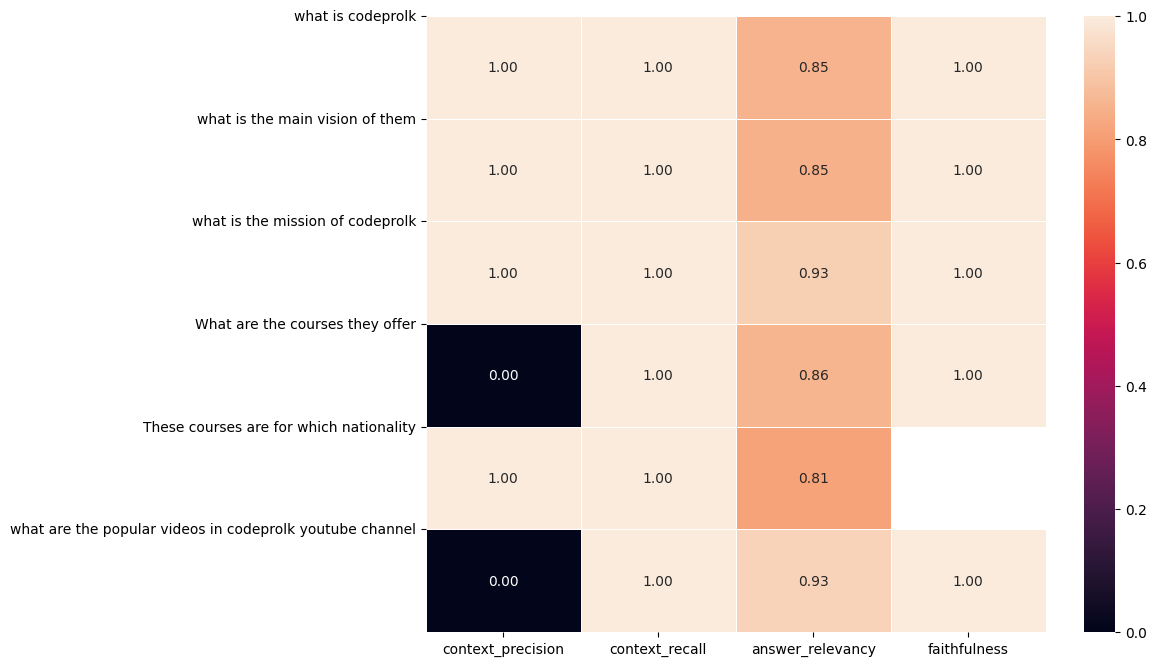

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = results[['context_precision', 'context_recall', 'answer_relevancy', 'faithfulness']]

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", linewidths=.5)

plt.yticks(ticks=range(len(results['question'])), labels=results['question'], rotation=0)

plt.show()